In [4]:
from langgraph.graph import Graph
from langgraph.graph import StateGraph

langgraph does the orchestration, which means it creates pipeline 
> langgraph --> orchestration --> pipeline

**langgraph consists of :**
> nodes,edges,States

where representations are like, 
1. node --> functions 
2. edges --> connectivity between nodes(functions)

In [9]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model = "models/embedding-001")

from langchain_groq import ChatGroq
llm=ChatGroq(model="deepseek-r1-distill-llama-70b")

In [11]:
llm.invoke("hi").content

'<think>\n\n</think>\n\nHello! How can I assist you today? 😊'

### Function 1

In [12]:
def LLM(input):
    llm = ChatGroq(model="deepseek-r1-distill-llama-70b")
    response = llm.invoke(input).content
    return response

### Function 2

In [13]:
def Counter_Token(input):
    token = input.split()
    token_length = len(token)
    response = f"Total no. of tokens in the generated output are : {token_length}"
    return response

In [17]:
workflow = Graph()

In [18]:
workflow.add_node("MY LLM",LLM)

In [19]:
workflow.add_node("Token Counter",Counter_Token)

In [20]:
workflow.add_edge("MY LLM","Token Counter")

In [21]:
workflow.set_entry_point("MY LLM")
workflow.set_finish_point("Token Counter")

## Most Important Step
### Compilation of Previous Steps : i.e., Storing previous work 

In [22]:
app = workflow.compile()

In [26]:
from IPython.display import Image, display

In [28]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=<class 'langgraph.graph.graph.LangGraphInput'>, metadata=None), 'MY LLM': Node(id='MY LLM', name='MY LLM', data=MY LLM(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), 'Token Counter': Node(id='Token Counter', name='Token Counter', data=Token Counter(tags=None, recurse=True, explode_args=False, func_accepts_config=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=<class 'langgraph.graph.graph.LangGraphOutput'>, metadata=None)}, edges=[Edge(source='MY LLM', target='Token Counter', data=None, conditional=False), Edge(source='Token Counter', target='__end__', data=None, conditional=False), Edge(source='__start__', target='MY LLM', data=None, conditional=False)])

## Getting Graph(workflow) drawn 

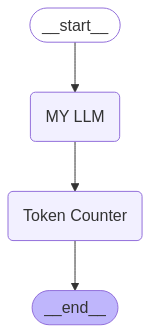

In [30]:
display(Image(app.get_graph().draw_mermaid_png()))

In [31]:
app.invoke("What is an agentic ai,explain it to me in very detail")

'Total no. of tokens in the generated output are : 965'

### Seperately checking out the output of each and every node 

In [32]:
for output in app.stream("What is an agentic ai,explain it to me in very detail?"): 
    for key,value in output.items():
        print(f"here is the output from {key}")
        print("__________________________")
        print(value)
        print("\n")

here is the output from MY LLM
__________________________
<think>
Okay, so I'm trying to understand what an agentic AI is. From what I remember, AI systems can be categorized in different ways based on their capabilities. I've heard terms like reactive, limited memory, theory of mind, and self-aware AI. Agentic AI might be somewhere along that spectrum, but I'm not exactly sure where.

I think "agentic" relates to agencies or agents. So maybe an agentic AI is an AI that acts as an agent. But what does that mean exactly? I remember reading about software agents before, like chatbots or personal assistants. They perform tasks on behalf of the user. So perhaps an agentic AI is an AI that can act autonomously to achieve specific goals.

Wait, the term "agent" in AI is a bit broader. An intelligent agent is a system that perceives its environment and takes actions to maximize its chances of success. So an agentic AI would be an AI that not only reacts to inputs but also plans and makes deci

In [33]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader,DirectoryLoader
from langchain_community.vectorstores import Chroma 
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [34]:
loader=DirectoryLoader("../data",glob="./*.txt",loader_cls=TextLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=500,
    chunk_overlap=200
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [35]:
doc_strings

['Madam Speaker, Madam Vice President, our First Lady and Second Gentleman. Members of Congress and the Cabinet. Justices of the Supreme Court. My fellow Americans.  \n\nLast year COVID-19 kept us apart. This year we are finally together again. \n\nTonight, we meet as Democrats Republicans and Independents. But most importantly as Americans. \n\nWith a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny.',
 'With a duty to one another to the American people to the Constitution. \n\nAnd with an unwavering resolve that freedom will always triumph over tyranny. \n\nSix days ago, Russia’s Vladimir Putin sought to shake the foundations of the free world thinking he could make it bend to his menacing ways. But he badly miscalculated. \n\nHe thought he could roll into Ukraine and the world would roll over. Instead he met a wall of strength he never imagined. \n\nHe met the Ukrainian people.',
 'He tho

In [36]:
db = Chroma.from_documents(new_docs,embeddings)

retriever = db.as_retriever(search_kwargs={"k":3})

In [37]:
query = "why scientist was working hard for what kind of vaccines?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

C:\Users\$\AppData\Local\Temp\ipykernel_4092\1463751420.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'source': '..\\data\\state_of_the_union.txt'}
The scientists are working hard to get that done and we’ll be ready with plenty of vaccines when they do. 

We’re also ready with anti-viral treatments. If you get COVID-19, the Pfizer pill reduces your chances of ending up in the hospital by 90%.  

We’ve ordered more of these pills than anyone in the world. And Pfizer is working overtime to get us 1 Million pills this month and more than double that next month.


In [38]:
docs

[Document(metadata={'source': '..\\data\\state_of_the_union.txt'}, page_content='The scientists are working hard to get that done and we’ll be ready with plenty of vaccines when they do. \n\nWe’re also ready with anti-viral treatments. If you get COVID-19, the Pfizer pill reduces your chances of ending up in the hospital by 90%.  \n\nWe’ve ordered more of these pills than anyone in the world. And Pfizer is working overtime to get us 1 Million pills this month and more than double that next month.'),
 Document(metadata={'source': '..\\data\\state_of_the_union.txt'}, page_content='We achieved this because we provided free vaccines, treatments, tests, and masks. \n\nOf course, continuing this costs money. \n\nI will soon send Congress a request. \n\nThe vast majority of Americans have used these tools and may want to again, so I expect Congress to pass it quickly.   \n\nFourth, we will continue vaccinating the world.     \n\nWe’ve sent 475 Million vaccine doses to 112 countries, more than

In [40]:
AgentState = {}
AgentState

{}

> AgentState is working here as a **Memory** and stores history

In [43]:
AgentState["messages"] = []
AgentState

{'messages': []}

In [44]:
AgentState["messages"].append("hi")

In [45]:
AgentState["messages"].append("How are you?")
AgentState["messages"].append("What are you doing?")
AgentState

{'messages': ['hi', 'How are you?', 'What are you doing?']}

In [46]:
def function_1(AgentState):
    message=AgentState["messages"]
    
    question=message[-1]
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState
   
def function_2(AgentState):
    messages = AgentState['messages']
    
    question = messages[0] ## Fetching the user question
    
    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [47]:
workflow=Graph()
workflow.add_node("LLM", function_1)
workflow.add_node("RAGtool", function_2)
workflow.add_edge('LLM', 'RAGtool')
workflow.set_entry_point("LLM")
workflow.set_finish_point("RAGtool")
app2 = workflow.compile()

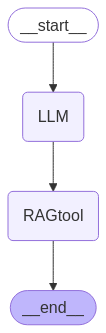

In [48]:
display(Image(app2.get_graph().draw_mermaid_png())) 

In [49]:
app2.invoke({"messages":["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?"]})

'<think>\nOkay, so I need to figure out what the phrase "cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body" means. Let me break it down step by step.\n\nFirst, I see that the sentence is talking about cancer. The context is about Heath, who was a soldier. The documents mention that Heath was exposed to burn pits. Burn pits are areas where waste is burned, often used in military settings. Prolonged exposure means he was around these burn pits for a long time.\n\nSo, the cancer is linked to this exposure. The sentence says that the cancer ravaged his lungs and body. "Ravaged" means caused severe damage or destruction. So, the cancer spread and badly damaged his lungs and overall body.\n\nLooking at the context, Danielle, Heath\'s widow, is mentioned. She\'s advocating for better treatment or recognition of the health issues caused by burn pits. The documents also mention other soldiers experiencing similar health problems, like headaches, numbness, dizziness, and

In [50]:
for output in app2.stream({"messages":["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?"]}):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from LLM
_______
{'messages': ["what is a meaning of 'cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body'?", '<think>\nOkay, so the user is asking about the meaning of the phrase "cancer from prolonged exposure to burn pits ravaged Heath’s lungs and body." I need to break this down. \n\nFirst, I know that burn pits are used in military settings to dispose of waste, often including hazardous materials. Prolonged exposure means being around these pits for a long time. \n\nThe chemicals and toxins from burning waste can release harmful fumes. Inhaling these over time could cause serious health issues, especially in the lungs. \n\nSo, the phrase suggests that Heath developed cancer because they were exposed to these harmful substances from burn pits over an extended period, which then damaged their lungs and overall body.\n</think>\n\nThe phrase means that Heath developed cancer due to long-term exposure to toxic fumes from burn pits, which severely d